# importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# loading the dataset checking its shape and first few rows

In [2]:
df=pd.read_csv(r"C:/Users/DELL/Desktop/kidney_predict.csv")

In [3]:

df.shape


(400, 14)

In [4]:
df.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


# data exploration and manipulation

In [5]:
#checking for missing values
df.isnull().sum()


Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

In [6]:
#finding out categorical variables
df.dtypes

Bp       float64
Sg       float64
Al       float64
Su       float64
Rbc      float64
Bu       float64
Sc       float64
Sod      float64
Pot      float64
Hemo     float64
Wbcc     float64
Rbcc     float64
Htn      float64
Class      int64
dtype: object

In [7]:
df.describe()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


# univariate analysis

In [8]:
#transforming a few continuous variables to categorical variables
df=df.astype({ 'Su': object,'Htn': object})

In [9]:
df.dtypes

Bp       float64
Sg       float64
Al       float64
Su        object
Rbc      float64
Bu       float64
Sc       float64
Sod      float64
Pot      float64
Hemo     float64
Wbcc     float64
Rbcc     float64
Htn       object
Class      int64
dtype: object

In [10]:
#target variable Class
df['Class'].value_counts()/len(df) 

1    0.625
0    0.375
Name: Class, dtype: float64

In [ ]:
# about 62.5% people have kidney disease while 37.5% do not have.

Text(0, 0.5, 'frequency')

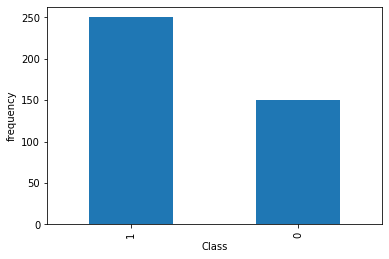

In [11]:
df['Class'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('frequency')

In [12]:
#categorical variable Htn(hypertension)
df['Htn'].value_counts()

0.00    251
1.00    147
0.37      2
Name: Htn, dtype: int64

In [13]:
df['Htn']=df['Htn'].astype(int) #to change it to integer

Text(0, 0.5, 'frequency')

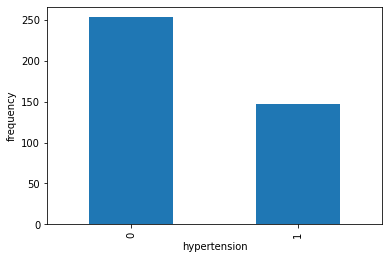

In [14]:
df['Htn'].value_counts().plot(kind='bar')
plt.xlabel('hypertension')
plt.ylabel('frequency')

Text(0.5, 0, 'Blood Pressure')

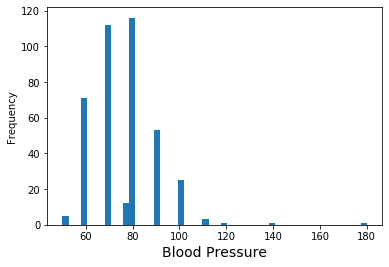

In [15]:
#continuous variables blood pressure and serum creatinine
df['Bp'].plot.hist(bins=50)
plt.xlabel('Blood Pressure',fontsize=14)

In [16]:
#the graph looks right skewed
# maximum people have bp in the range 65-80

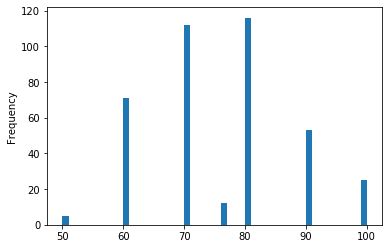

In [17]:
(df['Bp'].loc[df['Bp']<=100]).plot.hist(bins=50) #to normalise the curve

Text(0.5, 0, 'serum creatinine')

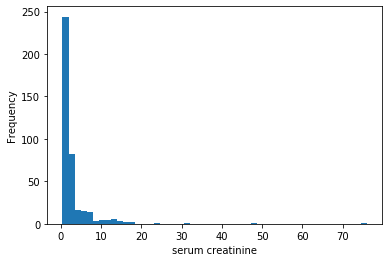

In [18]:
df['Sc'].plot.hist(bins=50)
plt.xlabel('serum creatinine')


In [19]:
#the graph is highly right skewed
#most of the people have creatinine in the range 1.1 -1.4

# hypothesis
The chances of having chronic kidney disease 
1.increases if the person has hypertension , high blood pressure.
2.increases if serum creatnine increases.
3.increases if blood urea increases.
4.high blood sugar level increases the chances of kidney failure.
5.dropped rbcc and low hb level signifies damaged kidneys

# Bivariate analysis 

In [20]:
df.pivot_table(values='Bp',index='Class',columns='Htn',aggfunc='median')

Htn,0,1
Class,,
0,70.0,NaN
1,76.0,80.0


In [21]:
# there is almost no possibilty that a person has hypertension but no chronic kidney disease

Text(0, 0.5, 'serum creatinine')

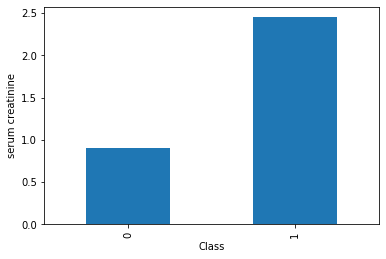

In [22]:
temp=df.groupby(['Class']).Sc.median()
temp.plot(kind='bar')
plt.ylabel('serum creatinine')

In [23]:
#creatinine above 0.9 increases the chances of kidney failure

Text(0, 0.5, 'blood urea')

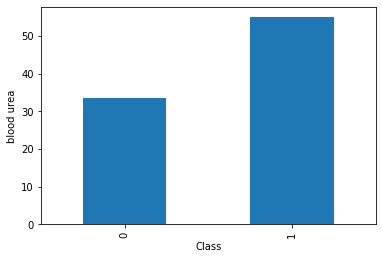

In [24]:
temp1=df.groupby(['Class']).Bu.median()
temp1.plot(kind='bar')
plt.ylabel('blood urea')

In [25]:
#people with blood urea greater than 33 have risk of renal failure

In [26]:
df.pivot_table(values='Sod',index='Class',columns='Su')

Su,0.0,1.0,2.0,3.0,4.0,5.0
Class,,,,,,
0,141.591000,NaN,NaN,NaN,NaN,NaN
1,134.729894,135.045385,136.784444,137.08,136.357692,133.176667


In [27]:
#people with no kidney disease and sugar level in category 0 have optimum sodium level.
#as the blood sugar level increases (category 1,2,3,4,5) the sodium level decreases and risk of kidney disease increases.
#people with high sugar levels have more risk of kidney disease.

Text(0, 0.5, 'haemoglobin')

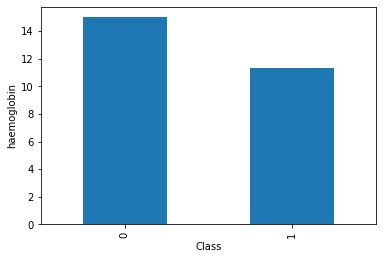

In [28]:
temp2=df.groupby(['Class']).Hemo.median()
temp2.plot(kind='bar')
plt.ylabel('haemoglobin')


In [29]:
# people having kidney disease have max hb 11 .
# people having kidney disease are anaemic.

# Training the model

In [30]:
#to convert all the strings to use sklearn
df=pd.get_dummies(df)

In [31]:
df.head()

,Bp,Sg,Al,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class,Su_0.0,Su_1.0,Su_2.0,Su_3.0,Su_4.0,Su_5.0
0,80.0,1.020,1.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1,1,1,0,0,0,0,0
1,50.0,1.020,4.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0,1,1,0,0,0,0,0
2,80.0,1.010,2.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0,1,0,0,0,1,0,0
3,70.0,1.005,4.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1,1,1,0,0,0,0,0
4,80.0,1.010,2.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0,1,1,0,0,0,0,0


In [87]:
#separating dependent and independent variables
X=df.drop(['Class'], axis=1)
y=df['Class']

In [88]:
#dividing the data into train and test
from sklearn.model_selection import train_test_split

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=101,stratify=y,test_size=0.25)

In [90]:
y_train.value_counts()/len(y_train)

1    0.623333
0    0.376667
Name: Class, dtype: float64

In [91]:
y_test.value_counts()/len(y_test)

1    0.63
0    0.37
Name: Class, dtype: float64

# Using Decision  Tree model

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
clf = DecisionTreeClassifier(random_state=10)

In [94]:
trained_model=clf.fit(X_train,y_train)

In [95]:
clf.score(X_train,y_train)

1.0

In [96]:
clf.score(X_test,y_test)

0.99